# Introduction to Convolutional Neural Netwoeks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms wich can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note:** We start with a smaller dataset wo we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-04 21:59:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.6MB/s    in 3.2s    

2024-02-04 21:59:39 (32.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view all the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


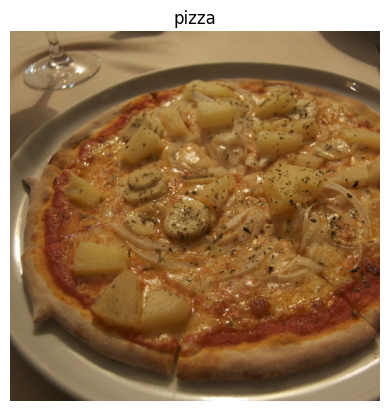

In [ ]:
# View a random image from the training dataset
img = view_random_image("pizza_steak/train/",
                        "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  71,  58],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  4

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the images arrays by 255 (since 255 is the maximun pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.16862745, 0.12941176, 0.09019608],
        [0.16470588, 0.1254902 , 0.08627451],
        [0.16470588, 0.1254902 , 0.08627451]],

       [[0.6627451 , 0.54509804, 0.39607843],
        [0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.17647059, 0.1372549 , 0.09803922],
        [0.17254902, 0.13333333, 0.09411765],
        [0.17254902, 0.13333333, 0.09411765]],

       [[0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        ...,
        [0.18431373, 0.14509804, 0.10588235],
        [0.18039216, 0.14117647, 0.10196078],
        [0.18039216, 0.14117647, 0.10196078]],

       ...,

       [[0.25882353, 0.19607843, 0.13333333],
        [0.25490196, 0.19215686, 0.12941176],
        [0.25098039, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # reduce size of image but keeps most of the information in the image
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(optimizer="Adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 345ms/step - loss: 0.6515 - accuracy: 0.6033 - val_loss: 0.5947 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.5211 - accuracy: 0.7460 - val_loss: 0.4004 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4643 - accuracy: 0.7927 - val_loss: 0.3552 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3851 - accuracy: 0.8327 - val_loss: 0.3287 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3478 - accuracy: 0.8473 - val_loss: 0.3558 - val_accuracy: 0.8540


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(optimizer="Adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 135ms/step - loss: 0.7436 - accuracy: 0.5047 - val_loss: 0.6866 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.6826 - accuracy: 0.5420 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(optimizer="Adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 125ms/step - loss: 3.6539 - accuracy: 0.6393 - val_loss: 0.7617 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.9589 - accuracy: 0.6960 - val_loss: 0.4951 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6912 - accuracy: 0.7487 - val_loss: 0.7547 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.5728 - accuracy: 0.7600 - val_loss: 0.8995 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.9462 - accuracy: 0.6927 - val_loss: 0.5514 - val_accuracy: 0.7460


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural networks seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


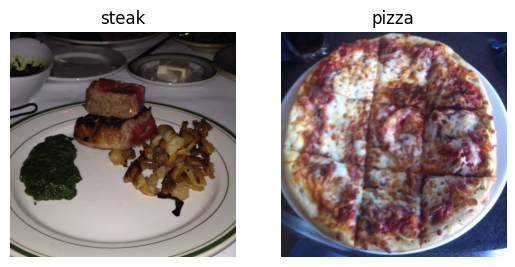

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather tan look at all 10,000 images at one time, a model migth only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU, TPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() #get the "next" batch of images/labels in train_Data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures you could create, So one of the best ways to get started is to start with something simple and see if it owrks on your data and then introduce complexity as required (e.g. look at wich current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.random import set_seed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
# Set the random seed
set_seed(42)

# Create the model (this wil be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

# Compile the mdoel
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 204ms/step - loss: 0.7408 - accuracy: 0.5300 - val_loss: 0.6402 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.5302 - accuracy: 0.7533 - val_loss: 0.3697 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.3758 - accuracy: 0.8440 - val_loss: 0.3949 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.2685 - accuracy: 0.9027 - val_loss: 0.3573 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1721 - accuracy: 0.9487 - val_loss: 0.3522 - val_accuracy: 0.8520


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.


<Axes: >

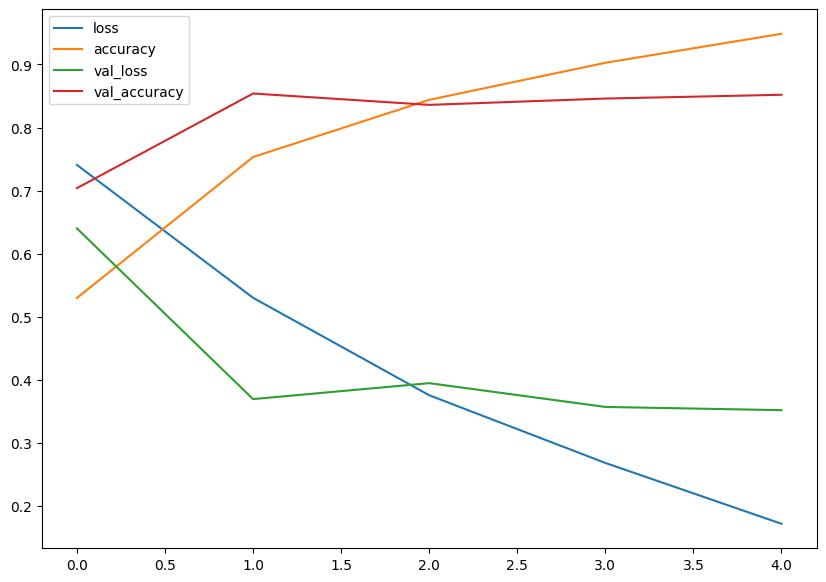

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
def plot_loss_curves(history):
  """
  Returns separete loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # Get how many epochs

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely the model is **overfiting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be dimished.

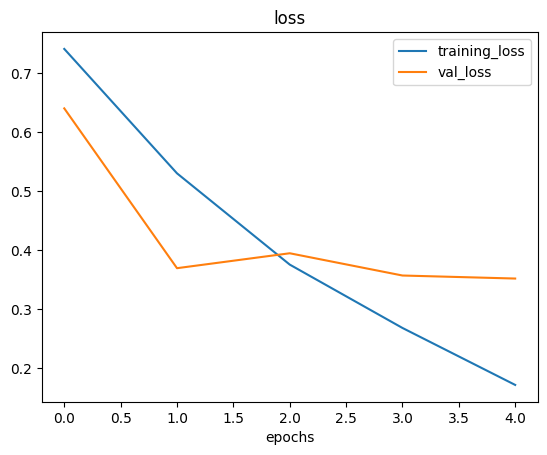

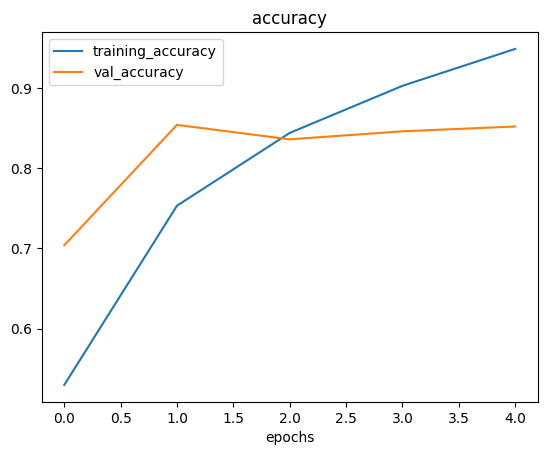

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model come in 3 steps:

0. Create a baseline
1. Beat the baseline by overfiting a larger model
2. Reduce overfiting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also know as *regularization*

In [ ]:
# Set random state
set_seed(42)

# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 188ms/step - loss: 0.6133 - accuracy: 0.6667 - val_loss: 0.4981 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4754 - accuracy: 0.7753 - val_loss: 0.3552 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4281 - accuracy: 0.8093 - val_loss: 0.3484 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4117 - accuracy: 0.8180 - val_loss: 0.4071 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3969 - accuracy: 0.8340 - val_loss: 0.3450 - val_accuracy: 0.8720


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

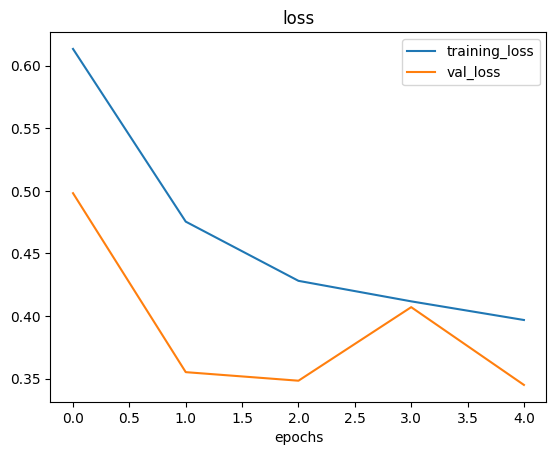

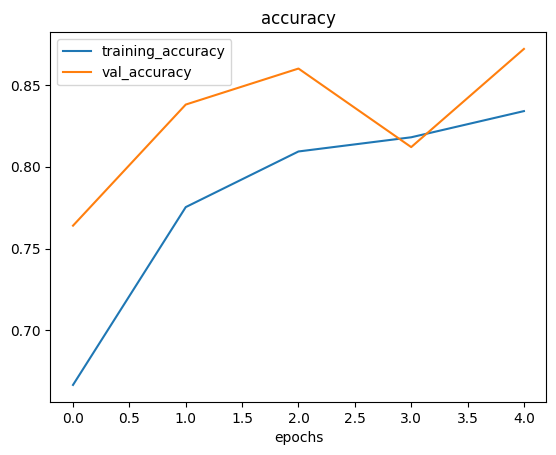

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   (224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demostration purpose only
# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              (224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(train_dir,
                                            (224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 1500 images belonging to 2 classes.


🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

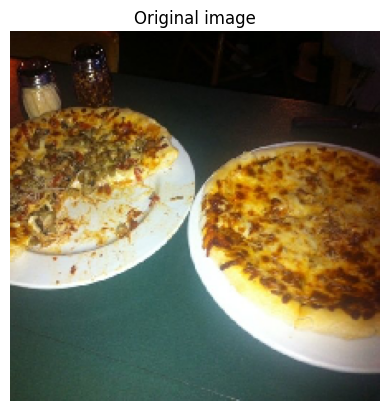

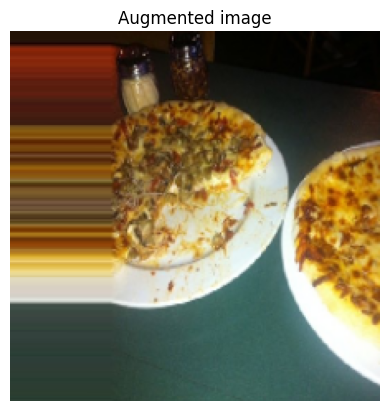

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")

plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
# Using augmented data to fit my model_5
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   (224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary") # Now shufelling the images

Found 1500 images belonging to 2 classes.


In [ ]:
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 565ms/step - loss: 0.4897 - accuracy: 0.7747 - val_loss: 0.3784 - val_accuracy: 0.8447
Epoch 2/5
47/47 [==============================] - 32s 686ms/step - loss: 0.4750 - accuracy: 0.7873 - val_loss: 0.3641 - val_accuracy: 0.8473
Epoch 3/5
47/47 [==============================] - 35s 736ms/step - loss: 0.4596 - accuracy: 0.7927 - val_loss: 0.3546 - val_accuracy: 0.8487
Epoch 4/5
47/47 [==============================] - 30s 647ms/step - loss: 0.4812 - accuracy: 0.7833 - val_loss: 0.3553 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4371 - accuracy: 0.8093 - val_loss: 0.3426 - val_accuracy: 0.8580


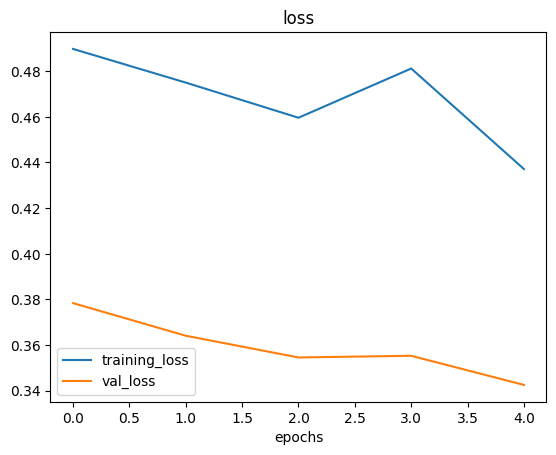

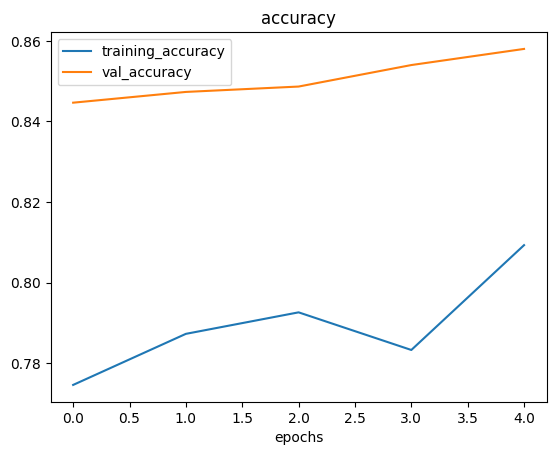

In [ ]:
# Checking new curves
plot_loss_curves(history_5)

🔑**Note:** When shuffiling training data, the model gets exposed to all different kinds of data during training, thus enabiling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've alredy beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the numer of filters in each convolutional layer (e.g. from to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjuts it for our own use case

> 🛠️ **Practice:** Recreate the model on the CNN explainer website and see how it performs on the augmented shuffled training data.

In [ ]:
# Set random seed
set_seed(42)

# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 543ms/step - loss: 0.6099 - accuracy: 0.6533 - val_loss: 0.4692 - val_accuracy: 0.7713
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5470 - accuracy: 0.7333 - val_loss: 0.4637 - val_accuracy: 0.8153
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.5096 - accuracy: 0.7567 - val_loss: 0.4087 - val_accuracy: 0.8087
Epoch 4/5
47/47 [==============================] - 26s 550ms/step - loss: 0.4940 - accuracy: 0.7600 - val_loss: 0.4144 - val_accuracy: 0.8113
Epoch 5/5
47/47 [==============================] - 26s 549ms/step - loss: 0.4676 - accuracy: 0.7947 - val_loss: 0.3993 - val_accuracy: 0.8280


## Making prediction with our trained model on our own custom data

--2024-02-04 22:09:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-02-04 22:09:57 (86.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

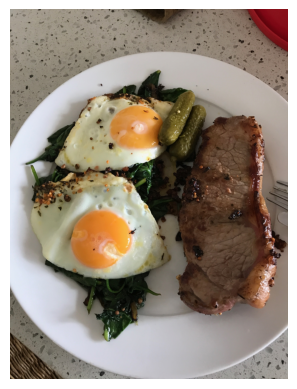

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

> 🔑**Note:** When you train a neural network and you want to make prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to used it wiht our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshaoes it to
  (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Resclae the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred = model_5.predict(tf.expand_dims(steak, axis=0))
pred_class = class_names[int(tf.round(pred))]
pred_class

1/1 [==============================] - 0s 264ms/step


'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 222ms/step


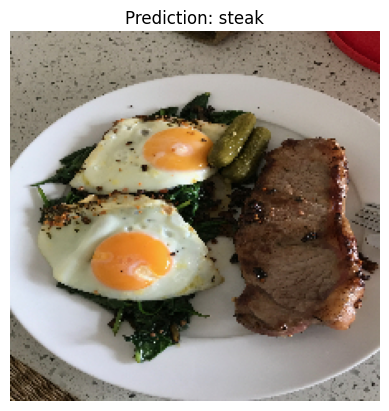

In [ ]:
pred_and_plot(model_6, "03-steak.jpeg")

--2024-02-04 22:10:01--  https://2trendies.com/hero/2023/04/pizzapepperoni.jpg?width=1200
Resolving 2trendies.com (2trendies.com)... 185.206.63.116
Connecting to 2trendies.com (2trendies.com)|185.206.63.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120901 (118K) [image/jpeg]
Saving to: ‘pizzapepperoni.jpg?width=1200’

pizzapepperoni.jpg? 100%[===================>] 118.07K  --.-KB/s    in 0.01s   

2024-02-04 22:10:01 (10.3 MB/s) - ‘pizzapepperoni.jpg?width=1200’ saved [120901/120901]

1/1 [==============================] - 0s 37ms/step


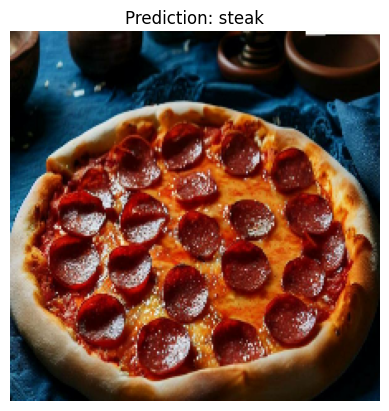

In [ ]:
# View our example image
!wget https://2trendies.com/hero/2023/04/pizzapepperoni.jpg?width=1200
pred_and_plot(model_6, "pizzapepperoni.jpg?width=1200")

# Multi-class Image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become ome whith the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the mode
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 0. Functions needed

In [1]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view all the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

In [2]:
def plot_loss_curves(history):
  """
  Returns separete loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # Get how many epochs

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [3]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshaoes it to
  (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Resclae the image (get all values between 0 and 1)
  img = img/255.
  return img

In [6]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## 1. Import and become one with the data

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-02-05 02:52:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   154MB/s    in 3.2s    

2024-02-05 02:52:17 (154 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import zipfile

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [5]:
# Let's get the class names
import pathlib
import numpy as np

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


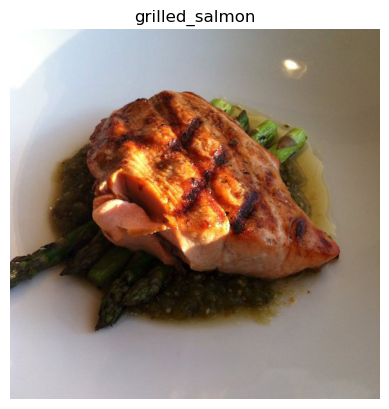

In [8]:
import random
img = view_random_image(train_dir,
                        random.choice(class_names))

## 2. Preprocess the data

In [7]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# Import data and augment it from training directory
print("Training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                        (224, 224),
                                                         batch_size=32,
                                                         class_mode="categorical")

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                            (224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Training data
Found 7500 images belonging to 10 classes.
Non-augmented test data
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [9]:
import tensorflow as tf

from tensorflow.random import set_seed
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
# Set random seed
set_seed(42)

# Create a model (CNN explainer)
model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

## 4. Fit the model

In [13]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 152s 644ms/step - loss: 2.2191 - accuracy: 0.1624 - val_loss: 2.1040 - val_accuracy: 0.2404
Epoch 2/5
235/235 [==============================] - 121s 513ms/step - loss: 1.9791 - accuracy: 0.3021 - val_loss: 1.9728 - val_accuracy: 0.2904
Epoch 3/5
235/235 [==============================] - 104s 440ms/step - loss: 1.6620 - accuracy: 0.4365 - val_loss: 1.8859 - val_accuracy: 0.3424
Epoch 4/5
235/235 [==============================] - 101s 429ms/step - loss: 1.0967 - accuracy: 0.6400 - val_loss: 2.2839 - val_accuracy: 0.3148
Epoch 5/5
235/235 [==============================] - 103s 436ms/step - loss: 0.4857 - accuracy: 0.8495 - val_loss: 2.8895 - val_accuracy: 0.3072


## 5. Evaluate the model

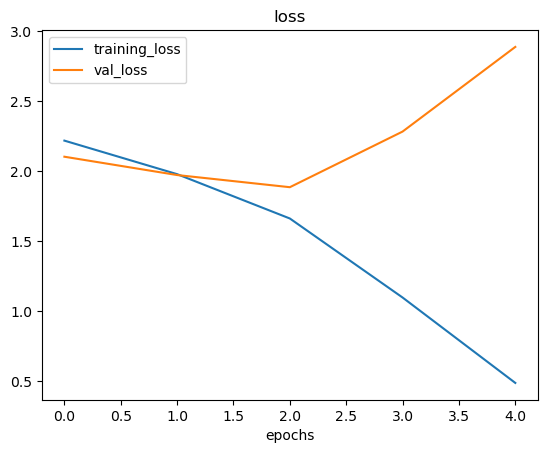

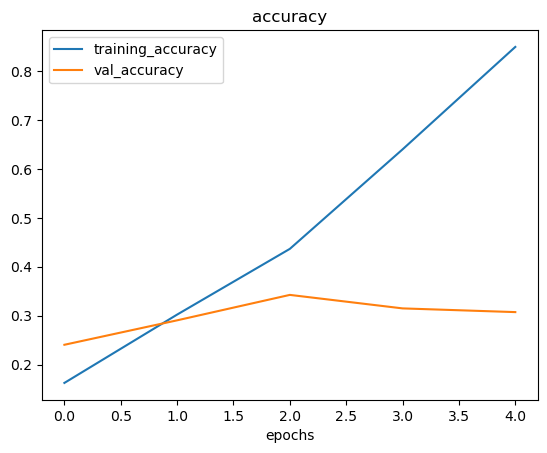

In [14]:
# Check out model curves
plot_loss_curves(history_1)

What do these loss curves tell us?

Well... it seems our model is **overfiting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters

In [15]:
# Lets try to simplify our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
# Let's remove 2 convolutional layers
set_seed(42)

# Create the model
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 85s 360ms/step - loss: 2.0946 - accuracy: 0.2409 - val_loss: 1.9270 - val_accuracy: 0.3188
Epoch 2/5
235/235 [==============================] - 83s 354ms/step - loss: 1.7787 - accuracy: 0.3945 - val_loss: 1.8350 - val_accuracy: 0.3632
Epoch 3/5
235/235 [==============================] - 80s 339ms/step - loss: 1.4059 - accuracy: 0.5485 - val_loss: 1.8441 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 77s 326ms/step - loss: 0.9051 - accuracy: 0.7212 - val_loss: 2.1483 - val_accuracy: 0.3396
Epoch 5/5
235/235 [==============================] - 76s 324ms/step - loss: 0.4773 - accuracy: 0.8707 - val_loss: 2.4685 - val_accuracy: 0.3224


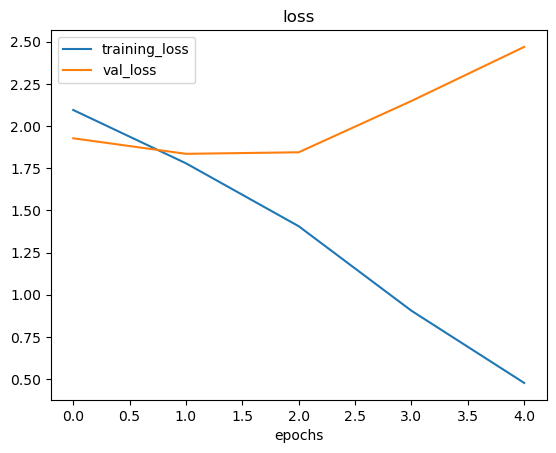

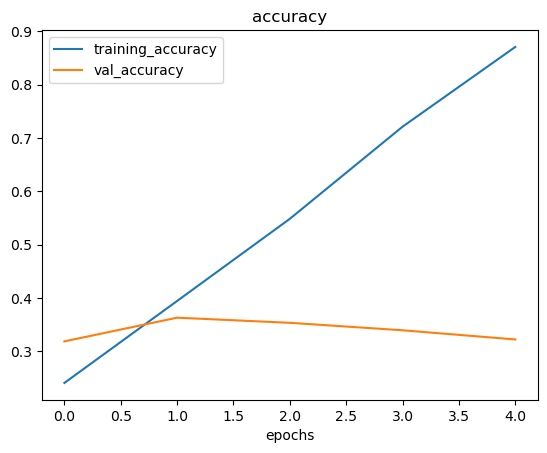

In [17]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Looks like our "simplifying the model" experiment didin't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

## Trying to reduce overfiting with data augmentation

In [11]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [12]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    (224, 224),
                                                                    batch_size=32,
                                                                    class_mode="categorical")

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                            (224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 7500 images belonging to 10 classes.
Non-augmented test data
Found 2500 images belonging to 10 classes.


In [13]:
# Set random seed
set_seed(42)

# Create the model
model_3 = tf.keras.models.clone_model(model_1)

# Compile the model
model_3.compile(optimizer=Adam(), 
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# Fit the model (using train_data_augmented)
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 162s 687ms/step - loss: 2.1796 - accuracy: 0.2053 - val_loss: 2.0412 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 148s 631ms/step - loss: 2.0926 - accuracy: 0.2561 - val_loss: 1.9565 - val_accuracy: 0.3080
Epoch 3/5
235/235 [==============================] - 149s 633ms/step - loss: 2.0546 - accuracy: 0.2599 - val_loss: 1.9228 - val_accuracy: 0.3096
Epoch 4/5
235/235 [==============================] - 141s 597ms/step - loss: 2.0113 - accuracy: 0.2985 - val_loss: 1.8406 - val_accuracy: 0.3828
Epoch 5/5
235/235 [==============================] - 140s 594ms/step - loss: 1.9739 - accuracy: 0.3104 - val_loss: 1.7811 - val_accuracy: 0.3884


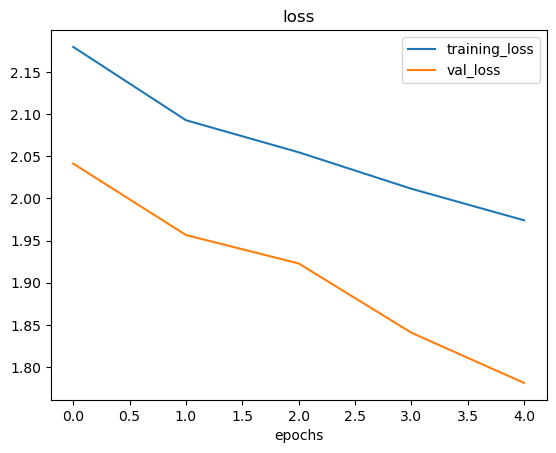

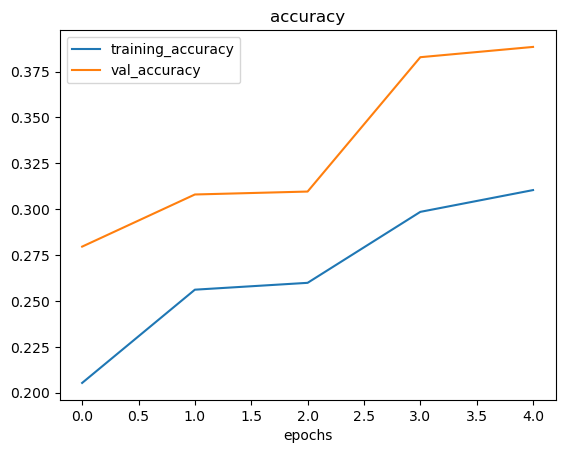

In [15]:
# Check out our model trained on augmented dataa's loss curves
plot_loss_curves(history_3)

Woah! That looks much better, the loss curves are much closer to each other tan the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvments.

## 7. Repeat until satisfied

- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**